# Descripción del Proyecto

Prepara un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada.

El modelo debe predecir la cantidad de oro extraído del mineral de oro. Dispones de los datos de extracción y purificación.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

In [1]:
# Importacion de librerias a utilizar

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer

In [2]:
## Leemos los archivos

full = pd.read_csv('../source/gold_recovery_full.csv')
train = pd.read_csv('../source/gold_recovery_train.csv')
test = pd.read_csv('../source/gold_recovery_test.csv')

In [3]:
# Analizando cada DF
full.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
20664,2018-05-24 23:59:59,5.255790,7.449669,7.287266,48.137851,38.055542,7.834192,NaN,8.925603,1.174400,...,30.008859,-498.618750,20.124775,-500.293563,17.988220,-499.680399,13.991448,-499.478780,14.016373,-499.067609
13268,2017-07-20 19:59:59,4.494999,12.951719,6.379695,42.733415,63.854771,9.286682,3.019543,9.994324,2.039690,...,21.998808,-499.422103,15.074498,-379.702614,18.015546,-499.819419,12.993676,-499.835377,14.995812,-498.294835
13545,2017-08-01 08:59:59,3.716639,9.716805,8.267627,46.512876,66.490040,8.558666,3.408574,10.731326,3.200596,...,12.998629,-497.138620,9.988360,-399.248188,11.059914,-499.227364,9.013429,-499.971528,11.982334,-498.997615
6929,2016-10-29 16:59:59,3.337590,10.180968,16.252751,48.555217,67.695287,8.357975,2.905757,10.942459,3.525705,...,20.027775,-500.538790,17.051829,-499.992024,17.004622,-490.497623,13.954373,-455.523912,22.025408,-477.001255
19863,2018-04-21 14:59:59,5.565885,9.492219,9.554911,45.997367,76.085796,11.818030,1.424930,9.105383,2.184790,...,27.000029,-496.419915,20.086529,-499.372367,19.959548,-497.028317,15.002372,-499.503088,18.007155,-499.446784


In [4]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [5]:
full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

![image.png](attachment:image.png)

In [6]:
# Queremos calcular que el calculo de recuperacion sea el correcto, por ende tomaremos la formula que nos indica el proyecto.
# Luego lo comparamos con la columna rougher.output.recovery a travez del EAM
def calcular_recuperacion (train):
    valores = []
    for C, F, T in zip(
        train['rougher.output.concentrate_au'],
        train['rougher.input.feed_au'],
        train['rougher.output.tail_au']
    ):
      if F * (C - T) != 0: #Evitamos una division cero
         recuperacion = ( C * (F - T) / (F * (C - T) )) * 100 # Aplicamos la formula
         valores.append(recuperacion)
      else:
         valores.append(None) # Sihay una division por cero, que se guarde como Nulo
    
    return pd.Series(valores) # transformamos a series
 
train['rougher_recovery_calculated'] = calcular_recuperacion (train) # Creamos una nueva columna para una mejor visualizacion y comparación

In [7]:
#Eliminamos valores nulos antes de calcular el error absoluto medio, con el fin de evitar calculos incorrectos
train.dropna(subset=['rougher_recovery_calculated','rougher.output.recovery'], inplace=True)
train['rougher.output.recovery'].isna().sum()

0

In [8]:
# Calcularemos el EAM para ver cuanto se desvia nuestro calculo en promedio de los valors reales.

EAM = mean_absolute_error(train['rougher.output.recovery'], train['rougher_recovery_calculated'])
print('Si el EAM es cercano a 0, entonces indica que nuestra calculo es preciso')
print('Si el EAM es alto (por ejemplo, mayor a 5 o 10) → Hay un error en nuestra fórmula ')

print(f'Nuestro EAM para el presente calculo es de: {EAM}')

Si el EAM es cercano a 0, entonces indica que nuestra calculo es preciso
Si el EAM es alto (por ejemplo, mayor a 5 o 10) → Hay un error en nuestra fórmula 
Nuestro EAM para el presente calculo es de: 9.303415616264301e-15


In [9]:
# Analizando las caractaristicas que faltan en el conjunto de prueba, convertimos ambos DF en conjuntos.
missing_columns = set(train.columns) - set(test.columns)
len(missing_columns) # Como esta en conjunto(set), por ello utilizaremos el len directamente.

35

In [10]:
# Validamos las columnas que faltan
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Se puede apreciar que hay 35 filas que no se encuentran en el DF de prueba, y esas son paramatros de salida de un proceso calculado.

In [11]:
print(len(test.columns))
print(len(train.columns))
print(len(full.columns))

53
88
87


## Realizamos el proprocesamiento de datos

In [12]:
# Veamos cuantos valores nulos hay en cada DF
print(train.isna().sum())
print(test.isna().sum())
print(full.isna().sum())

date                                            0
final.output.concentrate_ag                     5
final.output.concentrate_pb                     5
final.output.concentrate_sol                  232
final.output.concentrate_au                     4
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        3
secondary_cleaner.state.floatbank6_a_level      1
rougher_recovery_calculated                     0
Length: 88, dtype: int64
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.flo

In [13]:
(full.isna().sum() / len(full))*100

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

In [14]:
# Se toma de la decision de rellanar los valores vacios con la media ya que son valores numericos.
train.fillna(train.select_dtypes(include=['number']).mean(), inplace=True) # Se esta seleccionando solo los tipos numericos
test.fillna(test.select_dtypes(include=['number']).mean(), inplace=True)
full.fillna(full.select_dtypes(include=['number']).mean(), inplace=True)
print(train.isnull().sum())
print(test.isnull().sum())
print(full.isnull().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
rougher_recovery_calculated                   0
Length: 88, dtype: int64
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner

In [15]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22716 non-null  float64
 2   final.output.concentrate_pb                         22716 non-null  float64
 3   final.output.concentrate_sol                        22716 non-null  float64
 4   final.output.concentrate_au                         22716 non-null  float64
 5   final.output.recovery                               22716 non-null  float64
 6   final.output.tail_ag                                22716 non-null  float64
 7   final.output.tail_pb                                22716 non-null  float64
 8   final.output.tail_sol                               22716 non-null  float64


In [16]:
# Eliminamos las caracteristica fecha, para luego escalar.
train = train.drop(columns=['date'])
test = test.drop(columns=['date'])
full = full.drop(columns=['date'])

In [17]:
# Revisamos valores duplicados
print(f'Validamos valores duplicados en el DF train es de:', train.duplicated().sum())
print(f'Validamos valores duplicados en el DF test es de:', test.duplicated().sum())
print(f'Validamos valores duplicados en el DF full es de:', full.duplicated().sum())

Validamos valores duplicados en el DF train es de: 0
Validamos valores duplicados en el DF test es de: 6
Validamos valores duplicados en el DF full es de: 22


In [18]:
# Eliminamos valores duplicados en test y full
test.drop_duplicates(inplace=True)
full.drop_duplicates(inplace=True)
print(f'Validamos valores duplicados en el DF test es de:', test.duplicated().sum())
print(f'Validamos valores duplicados en el DF full es de:', full.duplicated().sum())

Validamos valores duplicados en el DF test es de: 0
Validamos valores duplicados en el DF full es de: 0


In [19]:
test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [20]:
# Analizando las caractaristicas que faltan en el conjunto de prueba, convertimos ambos DF en conjuntos.
missing_columns_test = set(full.columns) - set(test.columns)
print(len(missing_columns_test)) # Como esta en conjunto(set), por ello utilizaremos el len directamente.
missing_columns_test
print(full.shape)
print(test.shape)

34
(22694, 86)
(5850, 52)


In [21]:
train = train.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)
full = full.dropna().reset_index(drop=True)
feature = test.columns.values
target = ['rougher.output.recovery', 'final.output.recovery']


In [22]:
feature_train = train[feature].reset_index(drop=True)
target_train = train[target].reset_index(drop=True)
feature_test = test[feature].reset_index(drop=True)
target_test = full[target].iloc[test.index].reset_index(drop=True)


print(feature_test.shape)
print(target_test.shape)
print(feature_train.shape)
print(target_train.shape)

(5850, 52)
(5850, 2)
(14287, 52)
(14287, 2)


In [23]:
feature_train = pd.DataFrame(feature_train)
feature_test = pd.DataFrame(feature_test)

In [24]:
# print((target_train.isna().sum()) / len(target_train) * 100 ) 
print(target_test.isna().sum() / len(target_test) * 100)


rougher.output.recovery    0.0
final.output.recovery      0.0
dtype: float64


In [25]:
train[feature].reset_index(drop=True)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14282,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14283,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14284,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14285,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [26]:
# Escalamos los datos
scaler = StandardScaler()
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

## Analizamos los datos

### Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

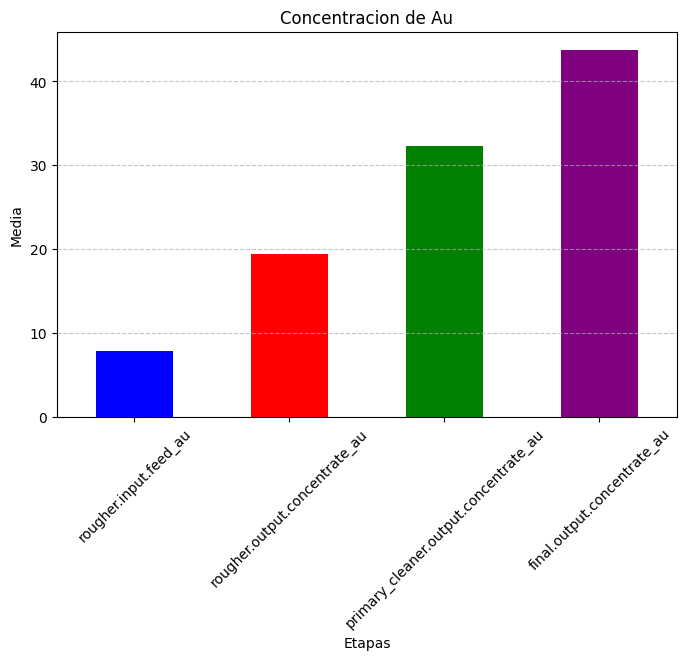

In [27]:
column_1 = ['rougher.input.feed_au', 'rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
train_au =train[column_1].mean()
plt.figure(figsize=(8, 5))
train_au.plot(kind="bar", color=["blue", "red", "green", "purple"])
plt.title("Concentracion de Au")
plt.xlabel("Etapas")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

La concentracion del mineral Au, esta teniendo un crecimiento sostenido.

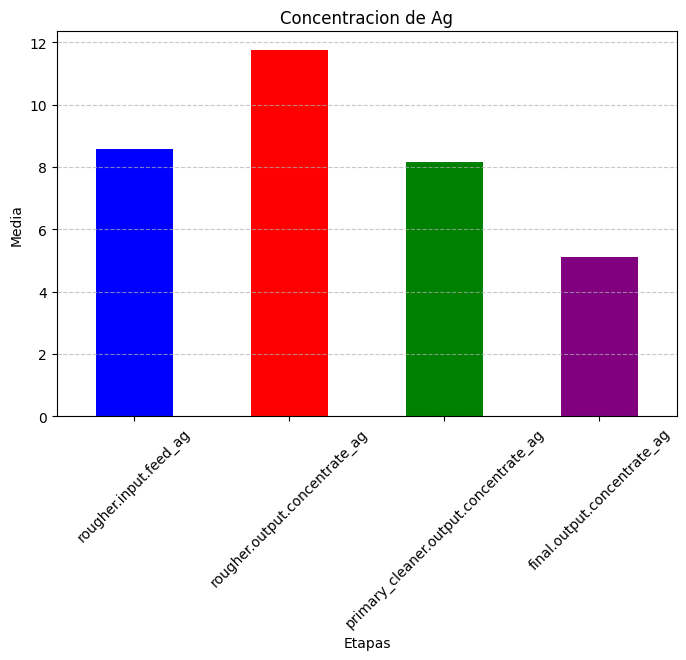

In [28]:
column_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
train_ag = train[column_ag].mean()
plt.figure(figsize=(8, 5))
train_ag.plot(kind="bar", color=["blue", "red", "green", "purple"])
plt.title("Concentracion de Ag")
plt.xlabel("Etapas")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

La media de las columnas indican que a medida que se va teniendo mas procesos en la purificacion, el nivel de concentrado de Ag va reduciendo.

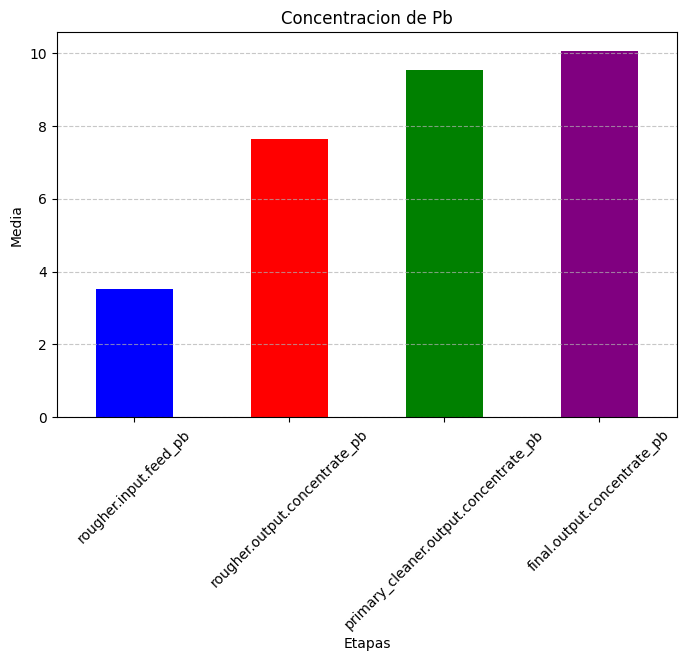

In [29]:
column_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']
train_pb = train[column_pb].mean()
plt.figure(figsize=(8, 5))
train_pb.plot(kind="bar", color=["blue", "red", "green", "purple"])
plt.title("Concentracion de Pb")
plt.xlabel("Etapas")
plt.ylabel("Media")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

A medida que va pasando los procesos de flotamiento y purificacion, el plomo esta aumentando en concentración.

### Analizamos la distribucion de las particulas de alimentacion

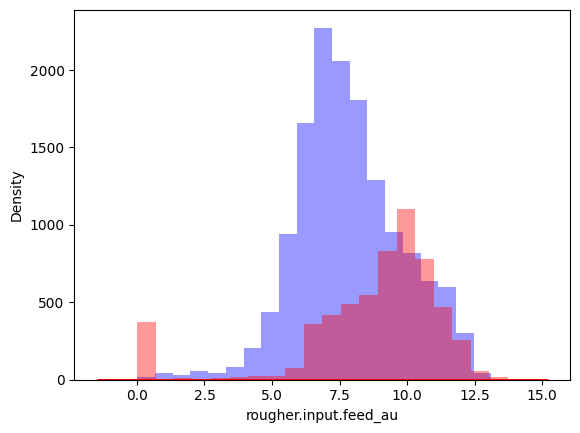

(14287, 87)
(5850, 52)


In [ ]:
# Analizando la distribucion del oro.
plt.hist(train['rougher.input.feed_au'], bins=20, alpha=0.4, label='Train', color='blue')
plt.hist(test['rougher.input.feed_au'], bins=20, alpha=0.4, label='Test', color='red')
sns.kdeplot(train['rougher.input.feed_au'], color="blue", label="Dataset 1", fill=True, alpha=0.3)
sns.kdeplot(test['rougher.input.feed_au'], color="red", label="Dataset 2", fill=True, alpha=0.3)
plt.show()
print(train.shape)
print(test.shape)
#Mantienen la distribucion, pero hay pequeñas varianzas en la media # prueba de hipotesis

La distribucion de alimentacion del Oro es normal para ambos DF, lo unico que varia es la media, adicional a ello, en el DF de test se tiene outlayers que se concentran en 0.

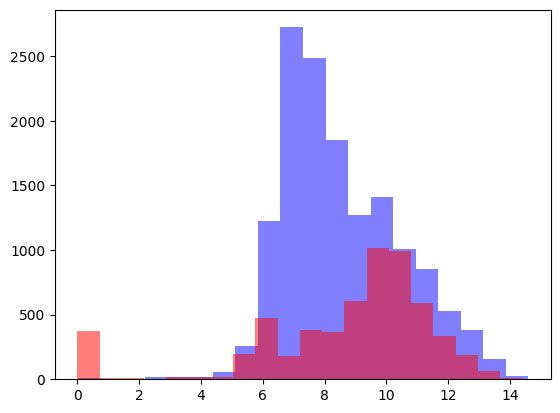

In [ ]:
# Analizando la distribucion de la plata
plt.hist(train['rougher.input.feed_ag'], bins=20, alpha=0.5, label='Train', color='blue')
plt.hist(test['rougher.input.feed_ag'], bins=20, alpha=0.5, label='Test', color='red')
plt.show()

La distribucion de alimentacion de la plata es normal para ambos DF, lo unico que varia es la media, adicional a ello, en el DF de test se tiene outlayers que se concentran en 0.

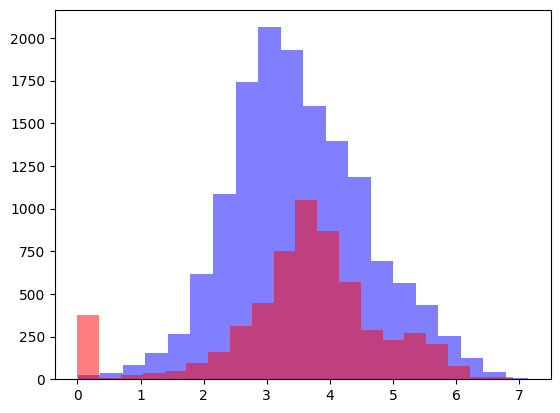

In [34]:
# Analizando la distribucion del plomo
plt.hist(train['rougher.input.feed_pb'], bins=20, alpha=0.5, label='Train', color='blue')
plt.hist(test['rougher.input.feed_pb'], bins=20, alpha=0.5, label='Test', color='red')
plt.show()

La distribucion de alimentacion del plomo es normal para ambos DF, lo unico que varia es la media, adicional a ello, en el DF de test se tiene outlayers que se concentran en 0.

### Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

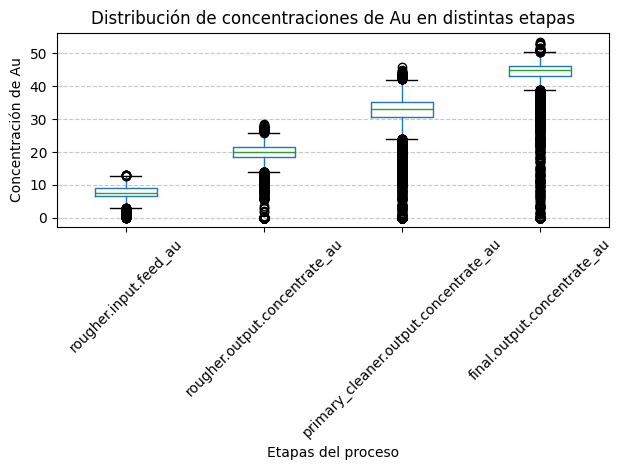

In [36]:
train[column_1].boxplot(rot=45, grid=False)
plt.title("Distribución de concentraciones de Au en distintas etapas")
plt.ylabel("Concentración de Au")
plt.xlabel("Etapas del proceso")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()  # Mejora la distribución visual del gráfico
plt.show()

A medida que pasa un proceso, la concentracion de Au va aumentando, lo cual es bueno.
 
Se observa muchos puntos fuera de los bigotes, lo que indica presencia de valores atipicos

In [38]:
# Diccionario para almacenar cantidad de outliers por columna
outliers_dict = {}

# Iteramos sobre cada columna en column_1 para calcular outliers individualmente
for col in column_1:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1

    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr

    # Calcular cantidad de outliers para la columna actual
    outliers_count = ((train[col] < limite_inferior) | (train[col] > limite_superior)).sum()

    # Guardar en el diccionario
    outliers_dict[col] = outliers_count

# Convertimos resultados a Serie para una mejor presentación
outliers_au = pd.Series(outliers_dict)

# Mostrar resultado
print("Cantidad de valores atípicos por columna:\n", outliers_au)

Cantidad de valores atípicos por columna:
 rougher.input.feed_au                    169
rougher.output.concentrate_au            660
primary_cleaner.output.concentrate_au    757
final.output.concentrate_au              956
dtype: int64


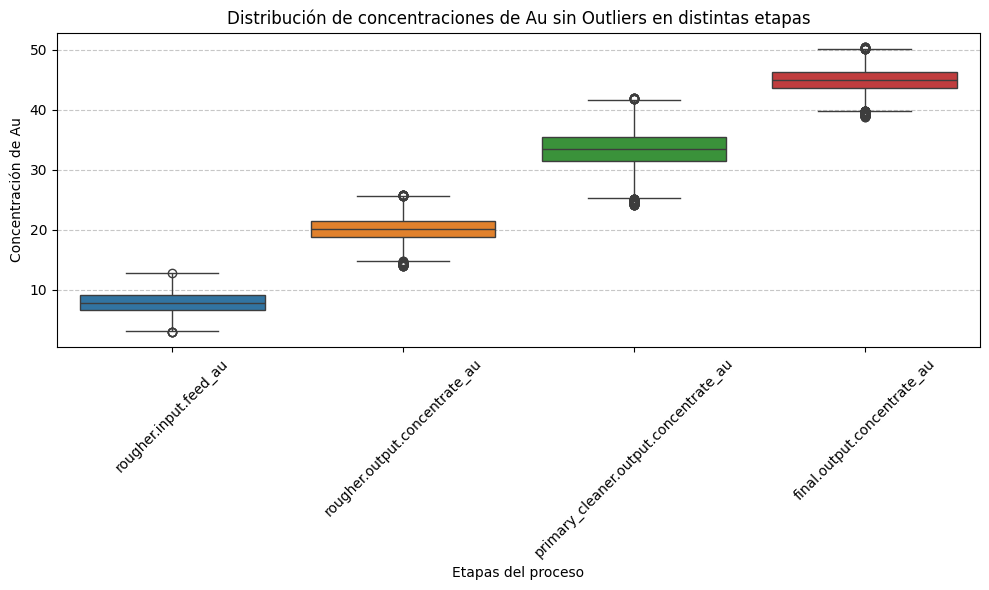

In [39]:
# Creamos una copia del DataFrame original para no modificarlo directamente
train_sin_outliers = train.copy()

# Iteramos sobre cada columna para remover individualmente sus outliers
for col in column_1:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1

    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr

    # Conservamos solo filas dentro de los límites para esta columna
    train_sin_outliers = train_sin_outliers[
        (train_sin_outliers[col] >= limite_inferior) & 
        (train_sin_outliers[col] <= limite_superior)
    ]

# Graficamos las columnas sin outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=train_sin_outliers[column_1])
plt.xticks(rotation=45)
plt.title("Distribución de concentraciones de Au sin Outliers en distintas etapas")
plt.ylabel("Concentración de Au")
plt.xlabel("Etapas del proceso")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

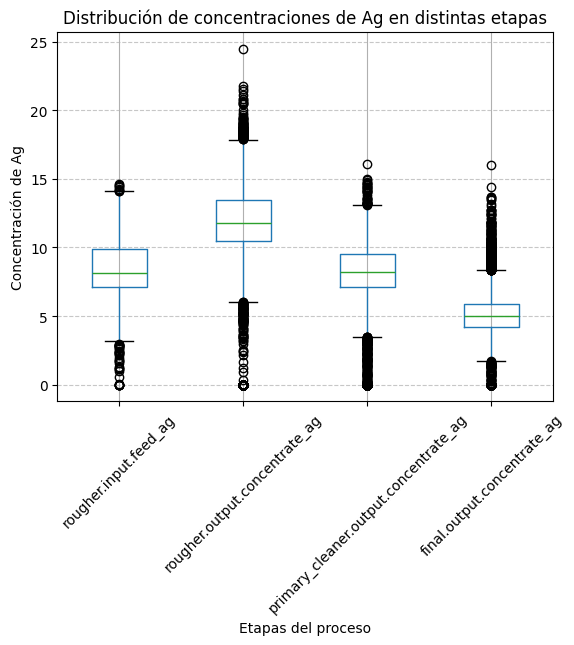

In [40]:
train[column_ag].boxplot()
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X si son largas
plt.title("Distribución de concentraciones de Ag en distintas etapas")
plt.ylabel("Concentración de Ag")
plt.xlabel("Etapas del proceso")
plt.grid(axis="y", linestyle="--", alpha=0.7)

A medida que pasa un proceso, la concentracion de Ag va disminuyendo, lo cual es malo. 2.- Se observa muchos puntos fuera de los bigotes, lo que indica presencia de valores atipicos

In [41]:
# Calculamos el Q1, Q3 para el mineral Ag
q1_ag = train[column_ag].quantile(0.25)
q3_ag = train[column_ag].quantile(0.75)
# Calculamos el rango interquartilico IQR

iqr_ag = q3_ag - q1_ag

#Definimos limitis de valores normales

limite_superior_ag = q3_ag + 1.5 * iqr_ag
limite_inferior_ag = q1_ag - 1.5 * iqr_ag

# Calculamos los Outliers
outliers_ag = ((train[column_ag] < limite_inferior_ag) | (train[column_ag] > limite_superior_ag)).sum()
print("Cantidad de valores atípicos por columna:\n", outliers_ag)

Cantidad de valores atípicos por columna:
 rougher.input.feed_ag                     43
rougher.output.concentrate_ag            526
primary_cleaner.output.concentrate_ag    419
final.output.concentrate_ag              532
dtype: int64


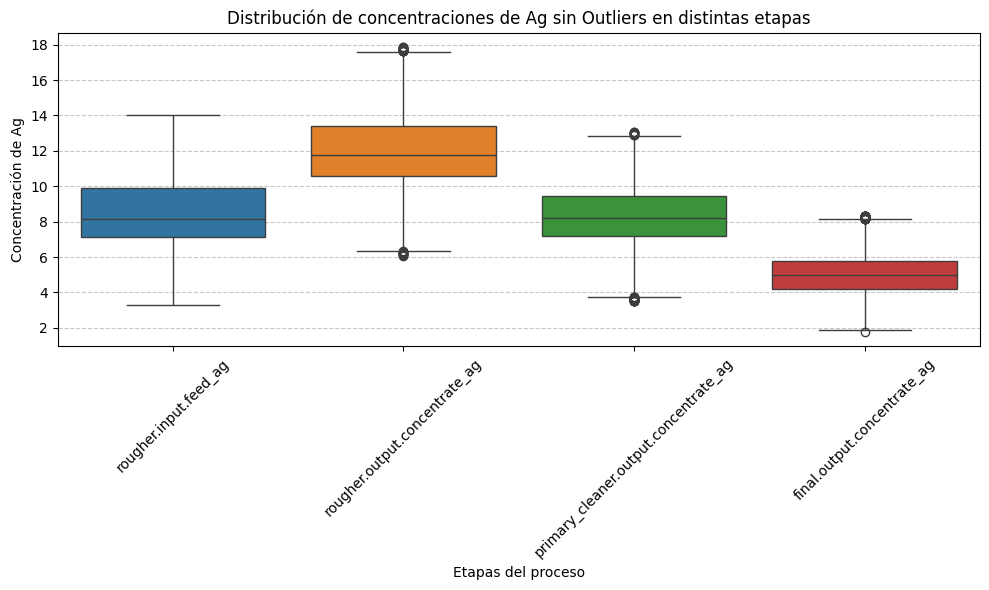

In [42]:
# Creamos una copia para evitar modificar el DataFrame original
train_sin_outliers_ag = train.copy()

# Iteramos sobre cada columna individualmente para remover sus outliers
for col in column_ag:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1

    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr

    # Filtramos las filas manteniendo solo valores dentro de los límites para esta columna
    train_sin_outliers_ag = train_sin_outliers_ag[
        (train_sin_outliers_ag[col] >= limite_inferior) & 
        (train_sin_outliers_ag[col] <= limite_superior)
    ]

# Graficamos los datos sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sin_outliers_ag[column_ag])
plt.xticks(rotation=45)
plt.title("Distribución de concentraciones de Ag sin Outliers en distintas etapas")
plt.ylabel("Concentración de Ag")
plt.xlabel("Etapas del proceso")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

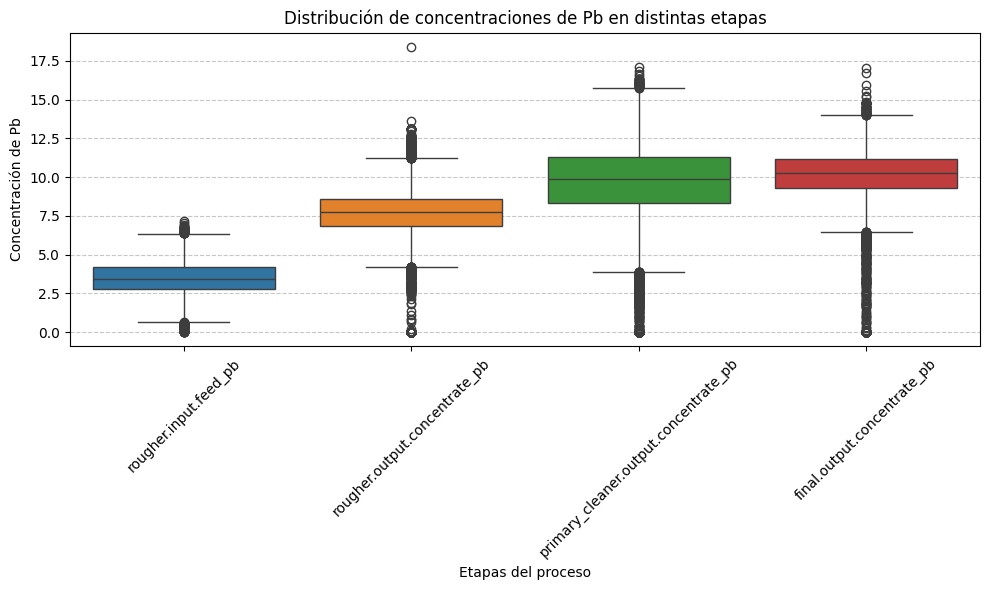

In [43]:
# Seleccionamos claramente las columnas relevantes
column_pb = [
    'rougher.input.feed_pb',
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb'
]

# Gráfico boxplot usando seaborn correctamente
plt.figure(figsize=(10, 6))
sns.boxplot(data=train[column_pb])
plt.xticks(rotation=45)
plt.title("Distribución de concentraciones de Pb en distintas etapas")
plt.ylabel("Concentración de Pb")
plt.xlabel("Etapas del proceso")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

La concentracion de PB aumenta a medida que avanza el proceso. 

La dispersion en el ultimo y penultimo proceso son las mas altas, lo que indica mayor variabilidad.

In [44]:
# Calculamos el Q1, Q3 para el mineral Pb
q1_pb = train[column_pb].quantile(0.25)
q3_pb = train[column_pb].quantile(0.75)
# Calculamos el rango interquartilico IQR

iqr_pb = q3_pb - q1_pb

#Definimos limitis de valores normales

limite_superior_pb = q3_pb + 1.5 * iqr_pb
limite_inferior_pb = q1_pb - 1.5 * iqr_pb

# Calculamos los Outliers
outliers_pb = ((train[column_pb] < limite_inferior_pb) | (train[column_pb] > limite_superior_pb)).sum()
print("Cantidad de valores atípicos por columna:\n", outliers_pb)

Cantidad de valores atípicos por columna:
 rougher.input.feed_pb                    114
rougher.output.concentrate_pb            858
primary_cleaner.output.concentrate_pb    553
final.output.concentrate_pb              460
dtype: int64


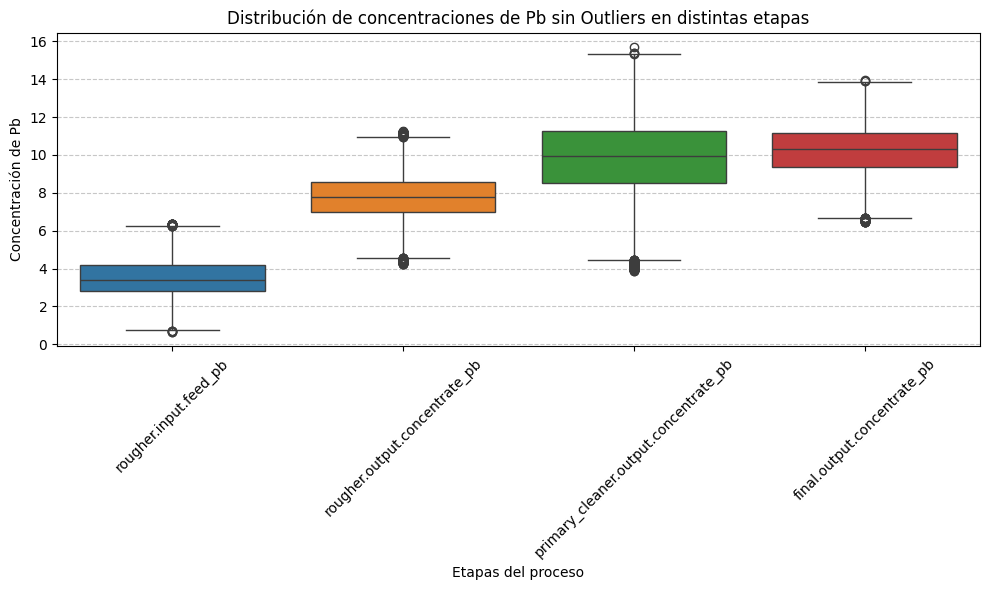

In [45]:
# Copia del DataFrame original para no modificarlo directamente
train_sin_outliers_pb = train.copy()

# Iterar por cada columna para eliminar outliers individuales
for col in column_pb:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1

    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr

    # Mantener filas solo con valores dentro de los límites para esta columna
    train_sin_outliers_pb = train_sin_outliers_pb[
        (train_sin_outliers_pb[col] >= limite_inferior) & 
        (train_sin_outliers_pb[col] <= limite_superior)
    ]

# Gráfico final sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_sin_outliers_pb[column_pb])
plt.xticks(rotation=45)
plt.title("Distribución de concentraciones de Pb sin Outliers en distintas etapas")
plt.ylabel("Concentración de Pb")
plt.xlabel("Etapas del proceso")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Construimos un modelo

## Escribe una función para calcular el valor final de sMAPE.

In [46]:
#Se realiza el cálculo de sMAPE
def smape_comp(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    dif = abs(y - y_pred)
    smape =  (1/n)*np.sum(dif /((real + pred)/2))*100
    return smape

def smape_pond(y, y_pred):
    
    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]
    
    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]
    
    smape_rougher = smape_comp(y_rougher, y_pred_rougher)
    smape_final = smape_comp(y_final, y_pred_final)
    
    return (0.25*smape_rougher + 0.75*smape_final)

In [47]:
smape_score = make_scorer(smape_pond)

In [48]:
lr_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=4)
forest_model = RandomForestRegressor(n_estimators=80, max_depth=4, bootstrap=True )

# Utilizamos la validación cruzada en los 3 modelos

lr_scores = cross_val_score(lr_model, feature_train, target_train, scoring = smape_score, cv = 5)
tree_scores = cross_val_score(tree_model, feature_train, target_train, scoring = smape_score, cv = 5)
forest_scores = cross_val_score(forest_model, feature_train, target_train, scoring = smape_score, cv = 5)

pd.options.mode.chained_assignment = None

lr_final_score = lr_scores.mean()
tree_final_score = tree_scores.mean()
forest_final_score = forest_scores.mean()

print('Puntajes sMAPE para cada iteración:', lr_scores)
print('Modelo de Regresión Lineal | sMAPE = {:.6f}'.format(lr_final_score))
print('Puntajes sMAPE para cada iteración:', tree_scores)
print('Modelo de Arbol de Decisiòn | sMAPE = {:.6f}'.format(tree_final_score))
print('Puntajes sMAPE para cada iteración:', forest_scores)
print('Modelo de Bosque | sMAPE = {:.6f}'.format(forest_final_score))

Puntajes sMAPE para cada iteración: [14.9334444  10.80045465 12.37083661 12.28094257 13.53463196]
Modelo de Regresión Lineal | sMAPE = 12.784062
Puntajes sMAPE para cada iteración: [10.29411206  9.95224722 13.3252628  12.2021183  10.10230606]
Modelo de Arbol de Decisiòn | sMAPE = 11.175209
Puntajes sMAPE para cada iteración: [10.26363731  8.82203701 12.25105032 11.77761869 10.31744695]
Modelo de Bosque | sMAPE = 10.686358


In [49]:
# Elegimos el modelo de bosque aleatorio ya que obtuvimos solo un 10% de error en comparacion con los demas modelos.
# Entrenamos el modelo.
forest_model.fit(feature_train, target_train)
forest_predict = forest_model.predict(feature_test)
RMSE = mean_squared_error(target_test, forest_predict) ** 0.5
print("RECM del mejor modelo en el conjunto de validación es", RMSE)

RECM del mejor modelo en el conjunto de validación es 13.860754963164068
